In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Week-2

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

In [5]:
X

array([[ 0.98337762,  0.03271361],
       [-0.01119427, -0.60327421],
       [-0.75002236, -0.94710257],
       ...,
       [ 0.00712504,  0.4884078 ],
       [ 0.78125085,  0.53305995],
       [-0.72139902,  0.54709001]])

## Problem 1
Plot the dataset using matplotlib.

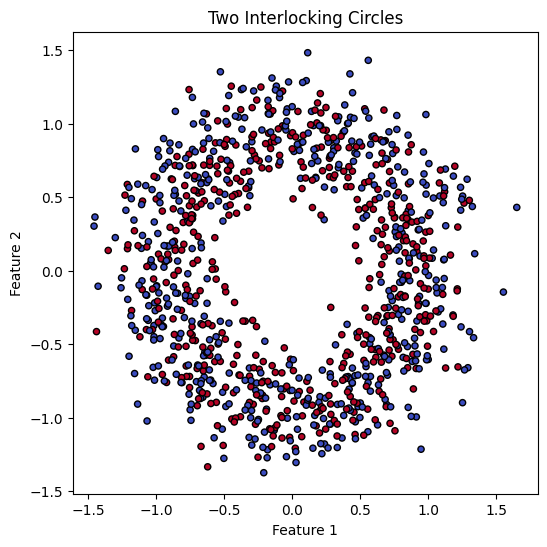

In [6]:
# Enter your solution here
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Two Interlocking Circles")
plt.show()

## Problem 2
How many samples are there in the dataset?


In [9]:
# Enter your solution here
X.shape[0]

1000

## Problem 3
How many features are there in the dataset?

In [8]:
# Enter your solution here
X.shape[1]

2

## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [13]:
# Enter your solution here
K = np.zeros((X.shape[0], X.shape[0]))
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        K[i, j] = (1 + np.dot(X[i], X[j])) ** 2


np.sqrt(np.sum(np.sum(K ** 2))) / X.shape[0]

2.096195646589988

## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [12]:
# Enter your solution here
K = np.zeros((X.shape[0], X.shape[0]))
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        K[i, j] = np.exp(-np.linalg.norm(X[i] - X[j]) ** 2 / (2 * 2 ** 2))


np.sqrt(np.sum(np.sum(K ** 2))) / X.shape[0]

0.8079400085320029

## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 2. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [14]:
K

array([[3.8734244 , 0.93945822, 0.0535745 , ..., 1.04649664, 3.18873491,
        0.09516585],
       [0.93945822, 1.86067355, 2.49563693, ..., 0.49741482, 0.44846213,
        0.45972501],
       [0.0535745 , 2.49563693, 6.04932138, ..., 0.28311315, 0.00824792,
        1.04635519],
       ...,
       [1.04649664, 0.49741482, 0.28311315, ..., 1.53411248, 1.60254605,
        1.5928031 ],
       [3.18873491, 0.44846213, 0.00824792, ..., 1.60254605, 3.58915224,
        0.53003958],
       [0.09516585, 0.45972501, 1.04635519, ..., 1.5928031 , 0.53003958,
        3.31139554]])

In [15]:
# Enter your solution here
KC = K - np.mean(K, axis=0) - np.mean(K, axis=1).reshape(-1, 1) + np.mean(K)
np.sqrt(np.sum(np.sum(KC ** 2)))

1451.7985176976847

## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the prjections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$\sum_{i = 1}^{n} \alpha_i + \sum_{i = 1}^{n} \beta_i$$

In [18]:
eigenvalues, eigenvectors = np.linalg.eigh(KC)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
PC1 = eigenvectors[:, 0]  # First principal component
PC2 = eigenvectors[:, 1]  # Second principal component
alpha = KC @ PC1  # Projections on the first PC
beta = KC @ PC2   # Projections on the second PC
result = np.sum(alpha) + np.sum(beta)
result

-1.9042545318370685e-12